### A5-Spark Exercise 

_Link to GitHub_ - <a href=https://github.com/yusif-ifraimov/Data-Science-M.Sc/tree/master/Computer%20Science%20for%20Big%20Data/A5-Spark%20Excercise> A5-Spark Exercise Repository Link </a>

**1.1 Importing Required Libraries** 


In [49]:
from pyspark import SparkConf
from pyspark import SparkContext as sc

#Creating an instance of the SparkContext class
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]")) #Creating an instance of the SparkContext class


**1.2 Loading all necessary files (in this case just one file)**

In [50]:
shakespeares_work = sc.textFile ('Spark_Exercise_A5/t8.shakespeare.txt')

#I should mention that I have done the cleaning of the file beforehand since there was lot's of licensing, donation and other 
#sort of garbage information which is not related to Shakespeare's work in the begining of the file. I will post the link to the 'clean' txt file on my GitHub. 


**1.3 Word Count**

In [51]:
counts = (shakespeares_work.flatMap(lambda line: line.lower().split())
                            .map(lambda key: (key, 1))
                            .reduceByKey(lambda i, j: i + j))


In [52]:
# 24 most used word Shakespeare's writings
top = counts.takeOrdered(24, key=lambda x: -x[1])
[print(i+1, item, sep=": ") for i,item in enumerate(top)]

1: ('the', 27486)
2: ('and', 25994)
3: ('i', 19540)
4: ('to', 18656)
5: ('of', 17958)
6: ('a', 14365)
7: ('my', 12455)
8: ('in', 10660)
9: ('you', 10597)
10: ('that', 10474)
11: ('is', 9117)
12: ('for', 7951)
13: ('with', 7924)
14: ('not', 7634)
15: ('your', 6862)
16: ('his', 6749)
17: ('be', 6685)
18: ('he', 5884)
19: ('but', 5881)
20: ('as', 5876)
21: ('this', 5860)
22: ('it', 5858)
23: ('have', 5675)
24: ('thou', 5138)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 1.4 I.Finding the 24th most used word in Shakespeare’s writings {.unnumbered}


In [46]:
print(top[23]) #Since python has the 'zero based listing' the 24th word will be indexed as 23rd

('thou', 5138)


### The 24th most used word in Shakespeare’s writings is **<font color='orange'>thou</font>** 

### 1.5 II.What installation did you worked with? Were there any obstacles? 

My initial idea was to install all onto my machine directly. <br>I found one nice guide here - <a href=https://medium.com/big-data-engineering/how-to-install-apache-spark-2-x-in-your-pc-e2047246ffc3> Spark 2: How to install it on Windows in 5 steps </a> tutorial and started to follow it. I should say that this guide reminded me of Kafka Installation on Windows which I performed at A3 Task. At some point I decided to look for other ways of installaton since I got some conflicts with JVM and Spark (There was an error saying tha there is no JVM at all on my machine and then after tuning I got another one saying that JVM version is wrong/corrupted).<br> 

Eventually, I found out that there are two more ways: **1. Using Vagrant Box** and **2. Using Google Colab**.

I decided to go with Vagrant because I used it a lot during Prof. Graupner's exercises and really loved it. <br>

As usually with Vagrant the installation is really simple. You need either to set insert appropriate command into vagrantfile or just type **\$ vagrant init fscm/spark-jupyter** and then type in **\$ vagrant up**. 

I typed... <br>


**Vagrant.configure("2") do |config| <br>
  config.vm.box = "fscm/spark-jupyter" <br>
end**<br>


...into vagrantfile and then ** \$vagrant** up have done everything for me :) <br><br><br><br><br><br><br><br><br><br><br><br>

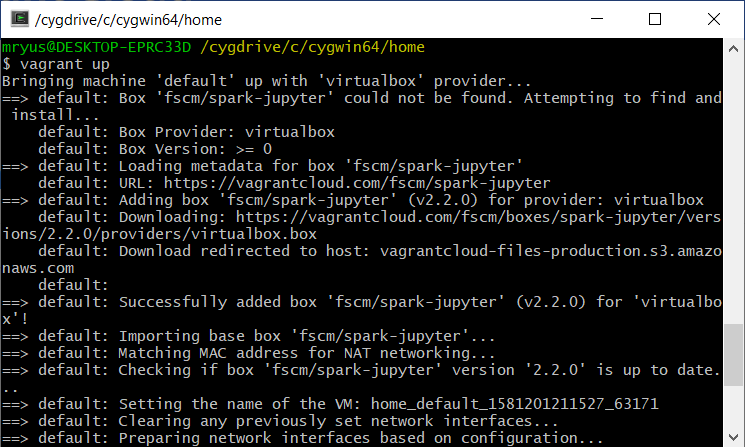

It took roughly 15 minutes for vagrant to set up everything and 0 minutes for me since there was no need to read and follow any tutorial.

Then I typed in 127.0.0.1:8888 in my Chrome Web-Browser, which directed me to Jupyter Notebook Server. <br>
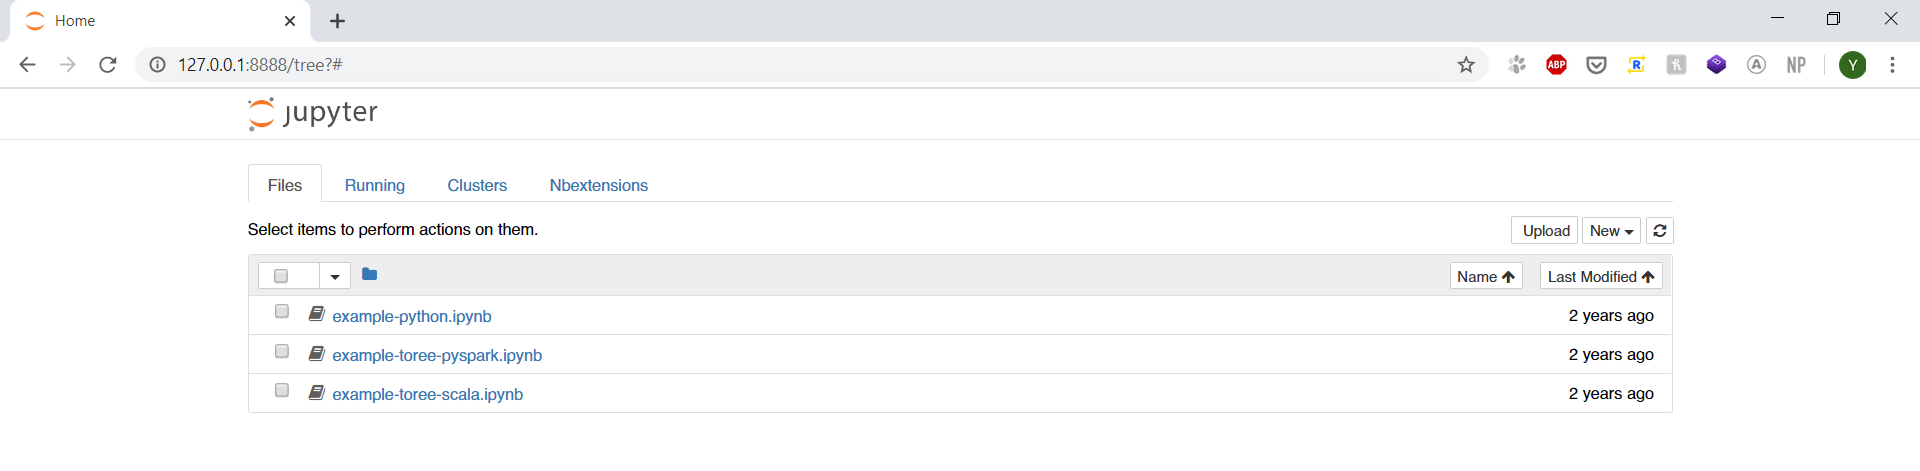

After that, everything I had to do was to type in the code and then just launch it :) I had no trouble at this step with the Spark and Jupyter Notebook despite some initial errors in the code itself which were corrected. <br> <br>
<b>And the task was completed! </b>



### 2. Some additional notes 

**2.1 Spark is pretty fast. It took 4.15 seconds for "1.3 Word count" part. That is really an amazing result! Probably for bigger files and tasks spark will come in handy.**

**2.2 If there is an option to use Vagrant instead of installing everything onto your system on your own then opt for Vagrant!**

**2.3 Check the files manually before processing them with your code. Sometimes there may be 'garbage' information, which can influence the results. Like in our case the file(txt) with Shakespeare's writings contained a licensing and other kind of information in the begining of the file which was not part of our task. Nevertheless, this wasn't crucial in this task since I didn't see any significant difference in the order of the most popular words (but there was difference in count of each of them). But I still think that a good practise to do that.**

**2.4 I really liked this task and was able to implement the knowledge from previous exercises and lectures (like Vagrant, VirtualBox, and Port Forwarding) there. Spark is an amazing technology and I will definetly learn and use it in the future!**